In [135]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import polars.selectors as cs

In [136]:
with open('../../DATA/Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [137]:
df = pl.read_csv("../../DATA/Ames_outliers_removed.csv")

In [138]:
df

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,…,i64,i64,i64,f64,f64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
526301100,20,"""RL""",141.0,31770,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,5,1960,1960,"""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""",112.0,"""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""",639.0,"""Unf""",0.0,…,0,0,1656,1.0,0.0,1,0,3,1,"""TA""",7,"""Typ""",2,"""Gd""","""Attchd""",1960.0,"""Fin""",2.0,528.0,"""TA""","""TA""","""P""",210,62,0,0,0,0,null,null,null,0,5,2010,"""WD ""","""Normal""",215000
526350040,20,"""RH""",80.0,11622,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""",5,6,1961,1961,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""",null,0.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""",468.0,"""LwQ""",144.0,…,0,0,896,0.0,0.0,1,0,2,1,"""TA""",5,"""Typ""",0,null,"""Attchd""",1961.0,"""Unf""",1.0,730.0,"""TA""","""TA""","""Y""",140,0,0,0,120,0,null,"""MnPrv""",null,0,6,2010,"""WD ""","""Normal""",105000
526351010,20,"""RL""",81.0,14267,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,6,1958,1958,"""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",108.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",923.0,"""Unf""",0.0,…,0,0,1329,0.0,0.0,1,1,3,1,"""Gd""",6,"""Typ""",0,null,"""Attchd""",1958.0,"""Unf""",1.0,312.0,"""TA""","""TA""","""Y""",393,36,0,0,0,0,null,null,"""Gar2""",12500,6,2010,"""WD ""","""Normal""",172000
526353030,20,"""RL""",93.0,11160,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",7,5,1968,1968,"""Hip""","""CompShg""","""BrkFace""","""BrkFace""",null,0.0,"""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",1065.0,"""Unf""",0.0,…,0,0,2110,1.0,0.0,2,1,3,1,"""Ex""",8,"""Typ""",2,"""TA""","""Attchd""",1968.0,"""Fin""",2.0,522.0,"""TA""","""TA""","""Y""",0,0,0,0,0,0,null,null,null,0,4,2010,"""WD ""","""Normal""",244000
527105010,60,"""RL""",74.0,13830,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""",5,5,1997,1998,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""",null,0.0,"""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""",791.0,"""Unf""",0.0,…,701,0,1629,0.0,0.0,2,1,3,1,"""TA""",6,"""Typ""",1,"""TA""","""Attchd""",1997.0,"""Fin""",2.0,482.0,"""TA""","""TA""","""Y""",212,34,0,0,0,0,null,"""MnPrv""",null,0,3,2010,"""WD ""","""Normal""",189900
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
923275080,80,"""RL""",37.0,7937,"""Pave"

In [139]:
df.head()

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,…,i64,i64,i64,f64,f64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
526301100,20,"""RL""",141.0,31770,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,5,1960,1960,"""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""",112.0,"""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""",639.0,"""Unf""",0.0,…,0,0,1656,1.0,0.0,1,0,3,1,"""TA""",7,"""Typ""",2,"""Gd""","""Attchd""",1960.0,"""Fin""",2.0,528.0,"""TA""","""TA""","""P""",210,62,0,0,0,0,null,null,null,0,5,2010,"""WD ""","""Normal""",215000
526350040,20,"""RH""",80.0,11622,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""",5,6,1961,1961,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""",null,0.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""",468.0,"""LwQ""",144.0,…,0,0,896,0.0,0.0,1,0,2,1,"""TA""",5,"""Typ""",0,null,"""Attchd""",1961.0,"""Unf""",1.0,730.0,"""TA""","""TA""","""Y""",140,0,0,0,120,0,null,"""MnPrv""",null,0,6,2010,"""WD ""","""Normal""",105000
526351010,20,"""RL""",81.0,14267,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,6,1958,1958,"""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",108.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",923.0,"""Unf""",0.0,…,0,0,1329,0.0,0.0,1,1,3,1,"""Gd""",6,"""Typ""",0,null,"""Attchd""",1958.0,"""Unf""",1.0,312.0,"""TA""","""TA""","""Y""",393,36,0,0,0,0,null,null,"""Gar2""",12500,6,2010,"""WD ""","""Normal""",172000
526353030,20,"""RL""",93.0,11160,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",7,5,1968,1968,"""Hip""","""CompShg""","""BrkFace""","""BrkFace""",null,0.0,"""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",1065.0,"""Unf""",0.0,…,0,0,2110,1.0,0.0,2,1,3,1,"""Ex""",8,"""Typ""",2,"""TA""","""Attchd""",1968.0,"""Fin""",2.0,522.0,"""TA""","""TA""","""Y""",0,0,0,0,0,0,null,null,null,0,4,2010,"""WD ""","""Normal""",244000
527105010,60,"""RL""",74.0,13830,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""",5,5,1997,1998,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""",null,0.0,"""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""",791.0,"""Unf""",0.0,…,701,0,1629,0.0,0.0,2,1,3,1,"""TA""",6,"""Typ""",1,"""TA""","""Attchd""",1997.0,"""Fin""",2.0,482.0,"""TA""","""TA""","""Y""",212,34,0,0,0,0,null,"""MnPrv""",null,0,3,2010,"""WD ""","""Normal""",189900


In [140]:
df.null_count()

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,490,0,0,2729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1775,23,0,0,0,80,80,83,80,1,81,1,…,0,0,0,2,2,0,0,0,0,0,0,0,0,1422,157,159,159,1,1,159,159,0,0,0,0,0,0,0,2915,2355,2822,0,0,0,0,0,0


In [141]:
df = df.drop("PID")

In [142]:
df.with_columns(pl.all().is_null().name.suffix("_null"))

MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,…,2nd Flr SF_null,Low Qual Fin SF_null,Gr Liv Area_null,Bsmt Full Bath_null,Bsmt Half Bath_null,Full Bath_null,Half Bath_null,Bedroom AbvGr_null,Kitchen AbvGr_null,Kitchen Qual_null,TotRms AbvGrd_null,Functional_null,Fireplaces_null,Fireplace Qu_null,Garage Type_null,Garage Yr Blt_null,Garage Finish_null,Garage Cars_null,Garage Area_null,Garage Qual_null,Garage Cond_null,Paved Drive_null,Wood Deck SF_null,Open Porch SF_null,Enclosed Porch_null,3Ssn Porch_null,Screen Porch_null,Pool Area_null,Pool QC_null,Fence_null,Misc Feature_null,Misc Val_null,Mo Sold_null,Yr Sold_null,Sale Type_null,Sale Condition_null,SalePrice_null
i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,f64,…,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
20,"""RL""",141.0,31770,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,5,1960,1960,"""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""",112.0,"""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""",639.0,"""Unf""",0.0,441.0,…,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,true,true,false,false,false,false,false,false
20,"""RH""",80.0,11622,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""",5,6,1961,1961,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""",null,0.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""",468.0,"""LwQ""",144.0,270.0,…,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,true,false,false,false,false,false,false
20,"""RL""",81.0,14267,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,6,1958,1958,"""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",108.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",923.0,"""Unf""",0.0,406.0,…,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,true,false,false,false,false,false,false,false
20,"""RL""",93.0,11160,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",7,5,1968,1968,"""Hip""","""CompShg""","""BrkFace""","""BrkFace""",null,0.0,"""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",1065.0,"""Unf""",0.0,1045.0,…,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,true,true,false,false,false,false,false,false
60,"""RL""",74.0,13830,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""",5,5,1997,1998,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""",null,0.0,"""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""",791.0,"""Unf""",0.0,137.0,…,false,false,false,false,false,false,false,false,false,false,false,false,false,

In [143]:
null_percentage = df.null_count() / df.shape[0] * 100

In [144]:
null_percentage.transpose(include_header=True, header_name="null_percentage", column_names=["Percentage"]).filter(pl.col("Percentage") != 0).sort('Percentage', descending=True)

null_percentage,Percentage
str,f64
"""Pool QC""",99.590024
"""Misc Feature""",96.412709
"""Alley""",93.235395
"""Fence""",80.457807
"""Mas Vnr Type""",60.642296
…,…
"""Bsmt Unf SF""",0.034165
"""Total Bsmt SF""",0.034165
"""Electrical""",0.034165


In [145]:
null_count = df.null_count().transpose(include_header=True, header_name="pertcentage", column_names=['Percentage'])

percent_nan = null_count.with_columns(
    (pl.col("Percentage") / df.height * 100).alias("percent_missing")
)

percent_nan = percent_nan.filter(pl.col('percent_missing') != 0)
percent_nan.sort('percent_missing', descending=True)

pertcentage,Percentage,percent_missing
str,u32,f64
"""Pool QC""",2915,99.590024
"""Misc Feature""",2822,96.412709
"""Alley""",2729,93.235395
"""Fence""",2355,80.457807
"""Mas Vnr Type""",1775,60.642296
…,…,…
"""Bsmt Unf SF""",1,0.034165
"""Total Bsmt SF""",1,0.034165
"""Electrical""",1,0.034165


In [146]:
def percent_missing(df):
    null_counts = df.null_count().transpose(include_header=True, header_name="pertcentage", column_names=['Percentage'])
    percent_nan = null_counts.with_columns(
        (pl.col("Percentage") / df.height * 100).alias("percent_missing")
    )
    percent_nan = percent_nan.filter(pl.col("percent_missing") != 0)
    percent_nan = percent_nan.sort("percent_missing", descending=False)

    return percent_nan

In [147]:
percent_nan = percent_missing(df)
percent_nan

pertcentage,Percentage,percent_missing
str,u32,f64
"""BsmtFin SF 1""",1,0.034165
"""BsmtFin SF 2""",1,0.034165
"""Bsmt Unf SF""",1,0.034165
"""Total Bsmt SF""",1,0.034165
"""Electrical""",1,0.034165
…,…,…
"""Mas Vnr Type""",1775,60.642296
"""Fence""",2355,80.457807
"""Alley""",2729,93.235395


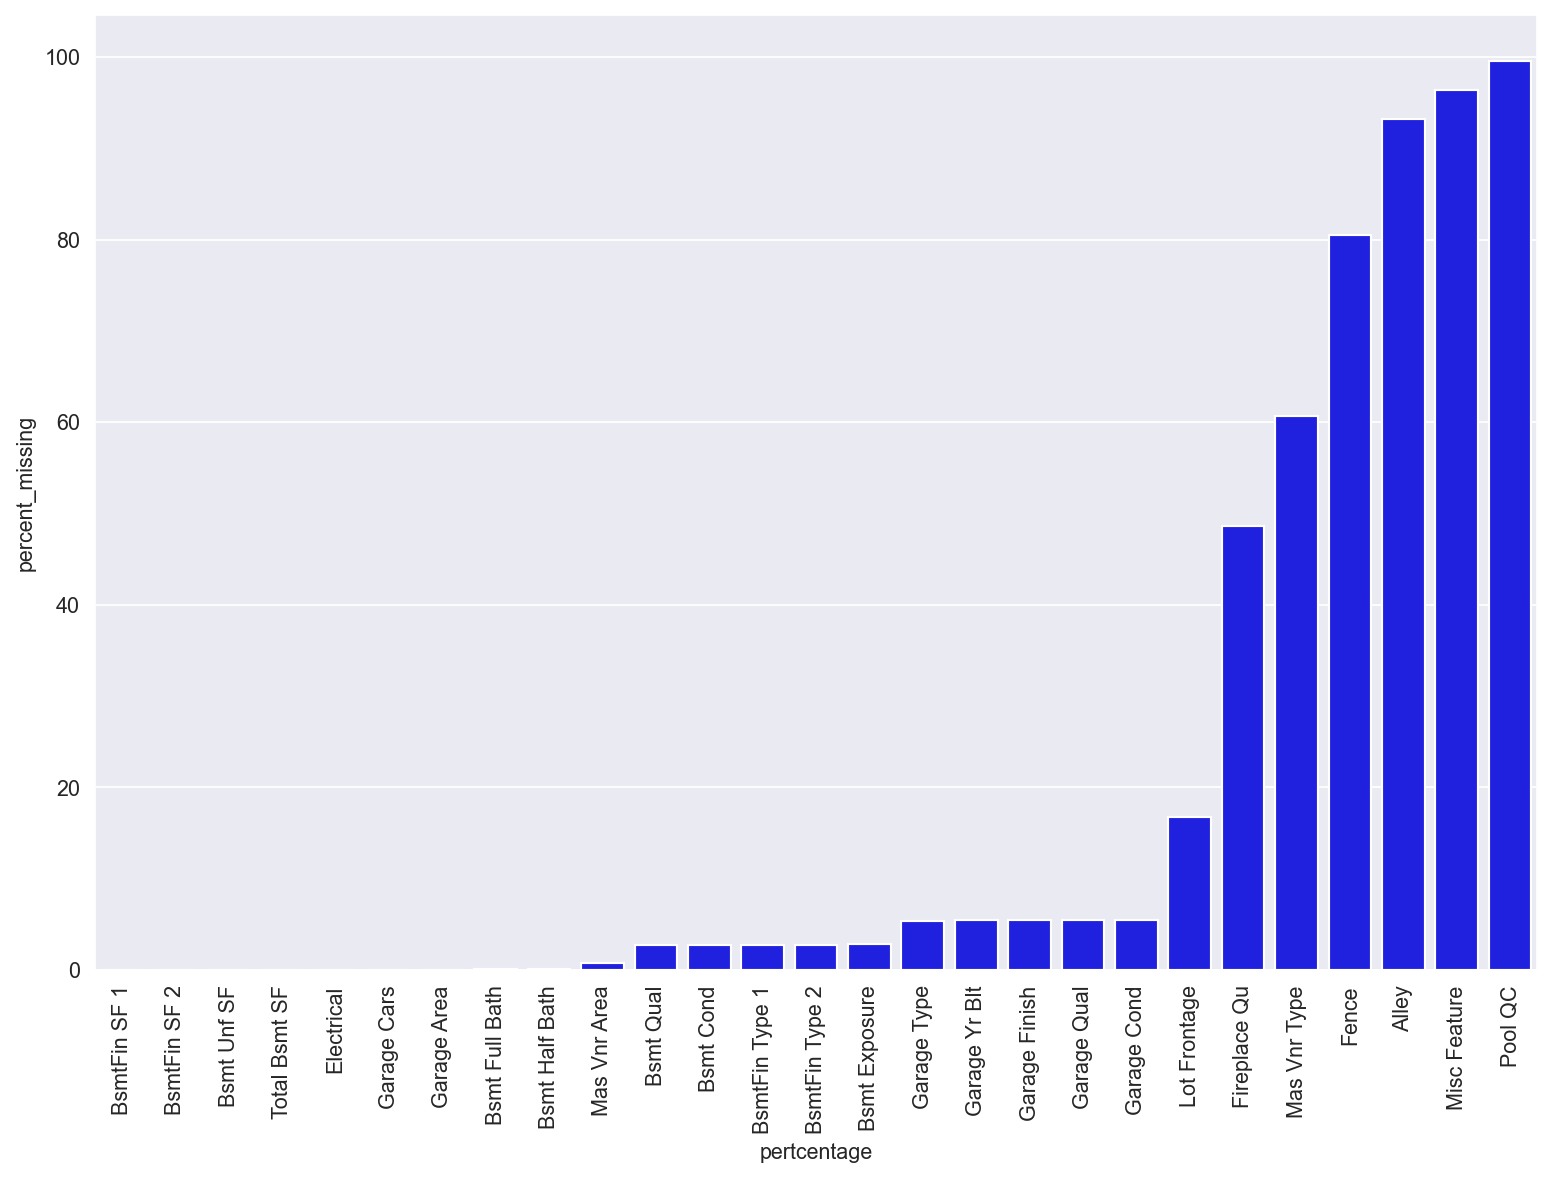

In [148]:
plt.figure(figsize=(12,8), dpi=155)
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.show()

(0.0, 1.0)

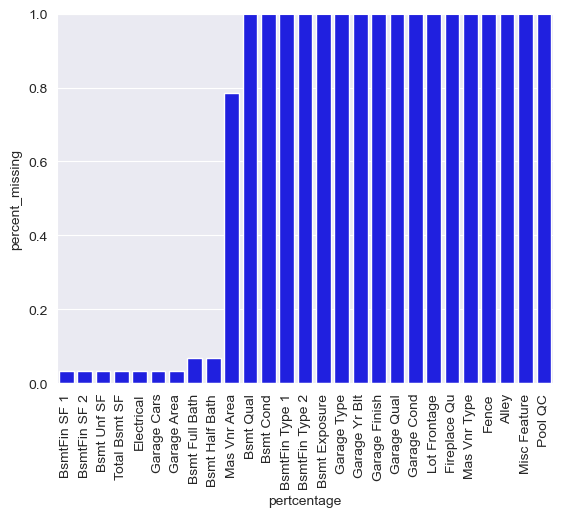

In [149]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.ylim(0, 1)

In [150]:
percent_nan.filter(pl.col('percent_missing') < 1)

pertcentage,Percentage,percent_missing
str,u32,f64
"""BsmtFin SF 1""",1,0.034165
"""BsmtFin SF 2""",1,0.034165
"""Bsmt Unf SF""",1,0.034165
"""Total Bsmt SF""",1,0.034165
"""Electrical""",1,0.034165
"""Garage Cars""",1,0.034165
"""Garage Area""",1,0.034165
"""Bsmt Full Bath""",2,0.068329
"""Bsmt Half Bath""",2,0.068329


In [151]:
100 / df.height

0.0341646737273659

In [152]:
df.select(
    pl.col('Total Bsmt SF').null_count(),
)

Total Bsmt SF
u32
1


In [153]:
df.select(
    pl.col('Bsmt Half Bath').null_count(),
)

Bsmt Half Bath
u32
2


In [154]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

In [155]:
df = df.with_columns(
    pl.col(bsmt_num_cols).fill_null(0)
)

In [156]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

In [157]:
df = df.with_columns(
    pl.col(bsmt_str_cols).fill_null("None")
)

In [158]:
percent_nan = percent_missing(df)

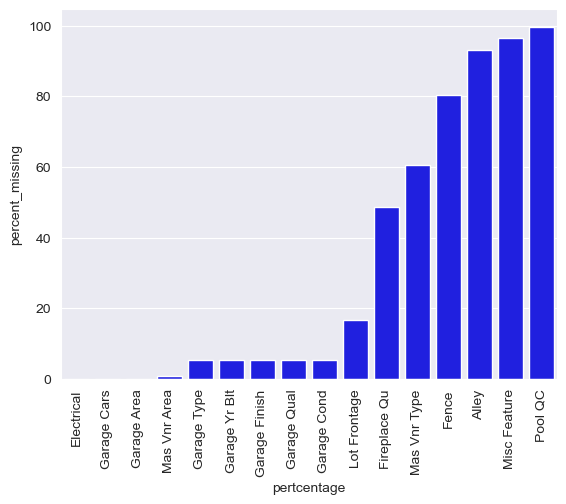

In [159]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.show()

In [160]:
df = df.drop(['Electrical','Garage Cars'])

In [161]:
percent_nan = percent_missing(df)

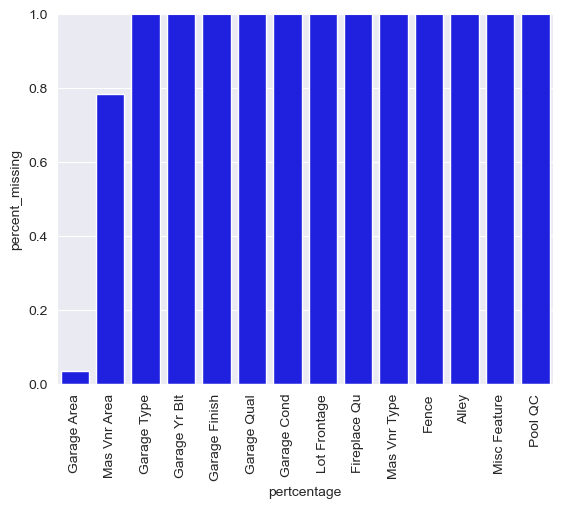

In [162]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.show()

In [163]:
df = df.with_columns(
    pl.col('Garage Area').fill_null(0),
    pl.col('Mas Vnr Type').fill_null('None'),
    pl.col('Mas Vnr Area').fill_null(0),
)

In [164]:
percent_nan = percent_missing(df)

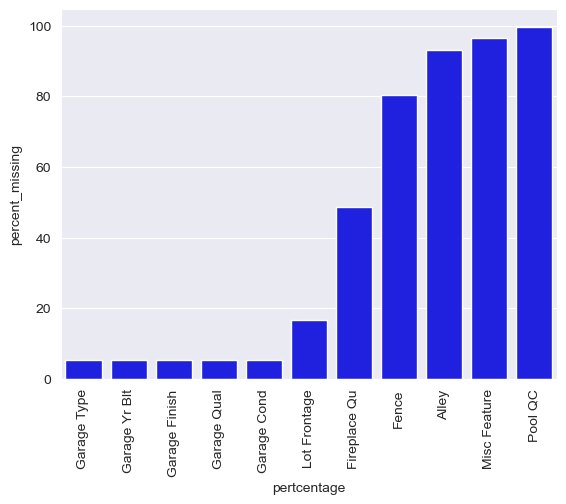

In [165]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.show()

In [166]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [167]:
df = df.with_columns(
    pl.col(gar_str_cols).fill_null("None"),
    pl.col('Garage Yr Blt').fill_null(0),
)

In [168]:
percent_nan = percent_missing(df)

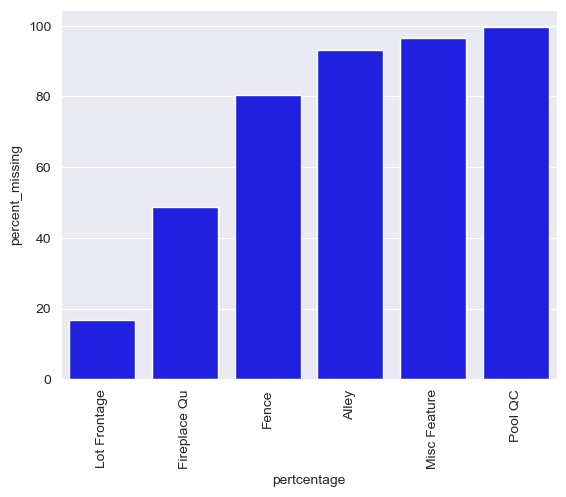

In [169]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.show()

In [170]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'])

In [171]:
percent_nan = percent_missing(df)

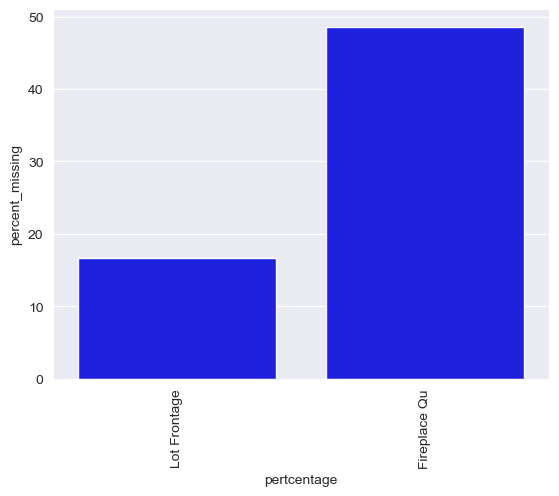

In [172]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.show()

In [173]:
df = df.with_columns(
    pl.col('Fireplace Qu').fill_null('None')
)

In [174]:
percent_nan = percent_missing(df)

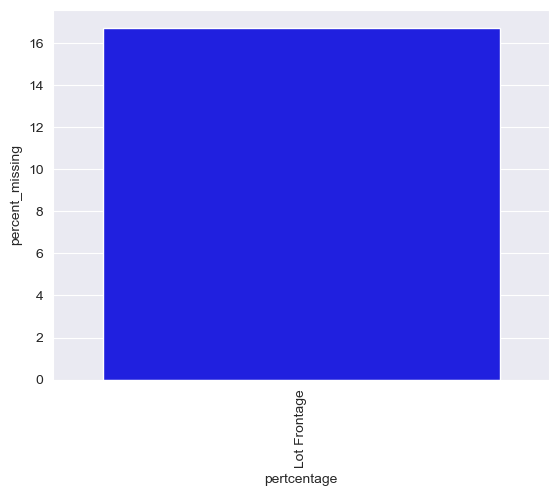

In [176]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.show()

In [181]:
df['Neighborhood'].unique().to_numpy()

array(['Somerst', 'Timber', 'IDOTRR', 'NoRidge', 'OldTown', 'MeadowV',
       'Blueste', 'Mitchel', 'ClearCr', 'NAmes', 'Greens', 'Blmngtn',
       'BrDale', 'SawyerW', 'Crawfor', 'GrnHill', 'StoneBr', 'NWAmes',
       'SWISU', 'CollgCr', 'Veenker', 'Landmrk', 'NPkVill', 'Sawyer',
       'Edwards', 'Gilbert', 'NridgHt', 'BrkSide'], dtype=object)

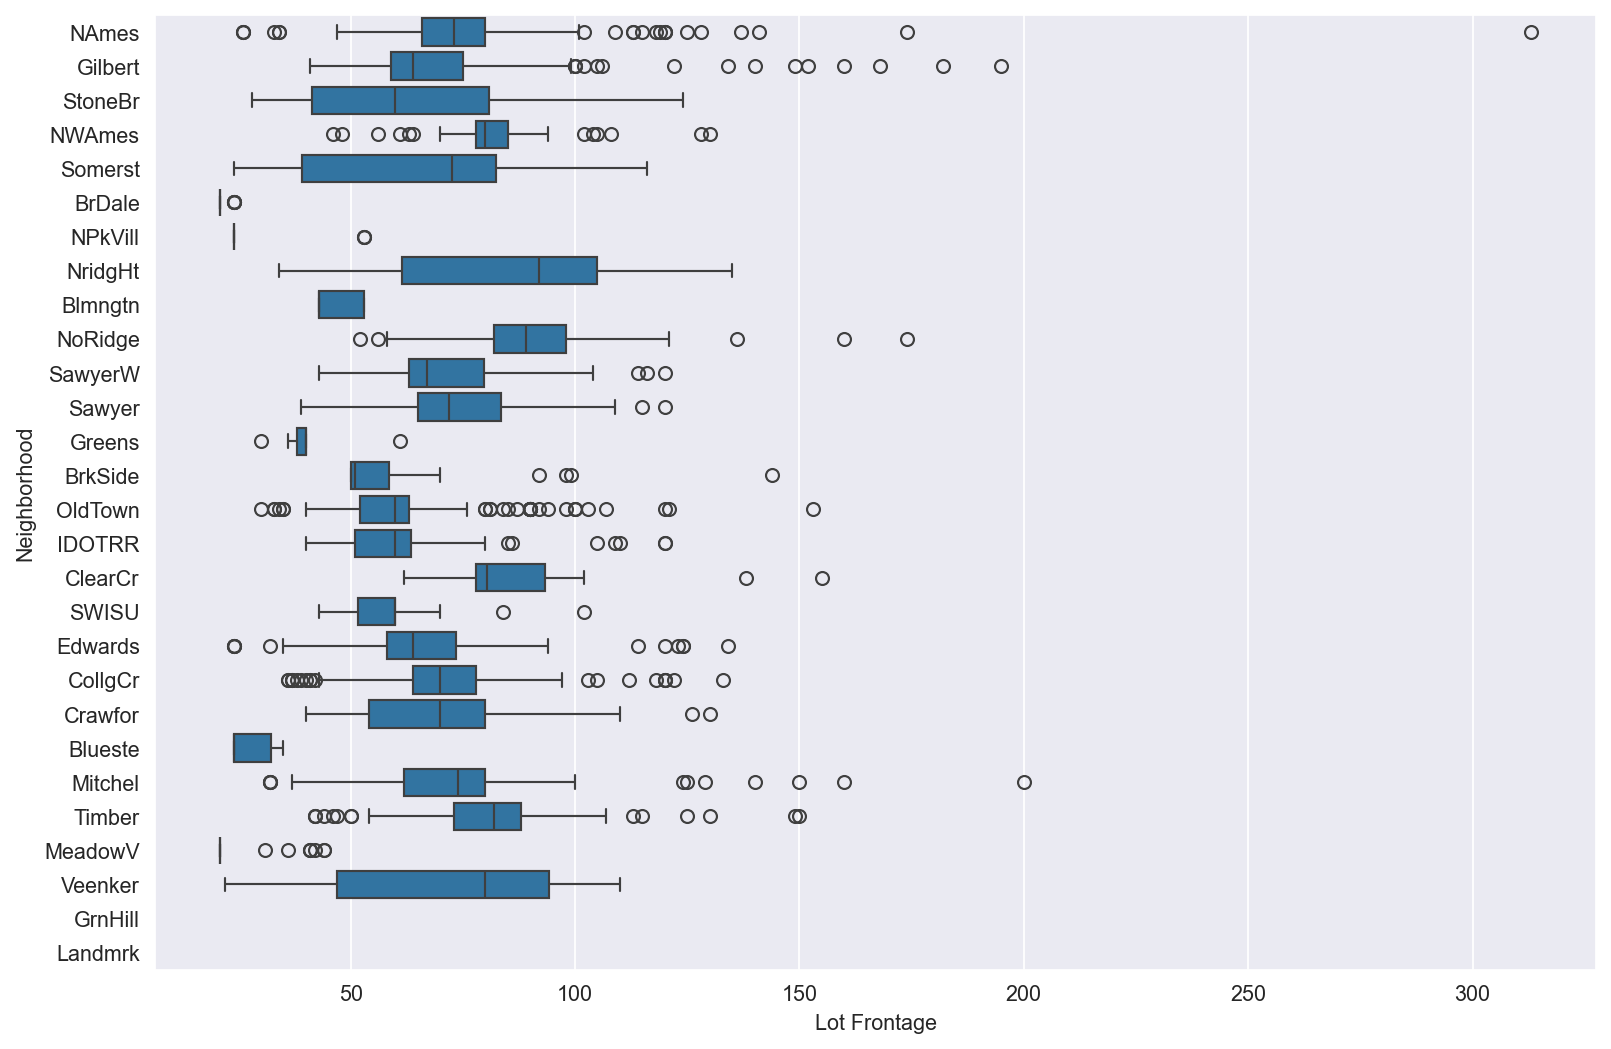

In [185]:
plt.figure(figsize=(12,8), dpi=155)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')
plt.show()

In [189]:
df.group_by('Neighborhood').agg(pl.col('Lot Frontage').mean())

Neighborhood,Lot Frontage
str,f64
"""StoneBr""",62.173913
"""Crawfor""",69.951807
"""SawyerW""",70.669811
"""Somerst""",64.549383
"""Edwards""",64.794286
…,…
"""Mitchel""",75.144444
"""Timber""",81.157895
"""IDOTRR""",62.241379


In [205]:
df = df.with_columns(
    pl.col("Lot Frontage").fill_null(
        pl.col("Lot Frontage").mean()
    )
)

In [206]:
df['Lot Frontage']

Lot Frontage
f64
141.0
80.0
81.0
93.0
74.0
…
37.0
75.144444
62.0


In [207]:
percent_nan = percent_missing(df)

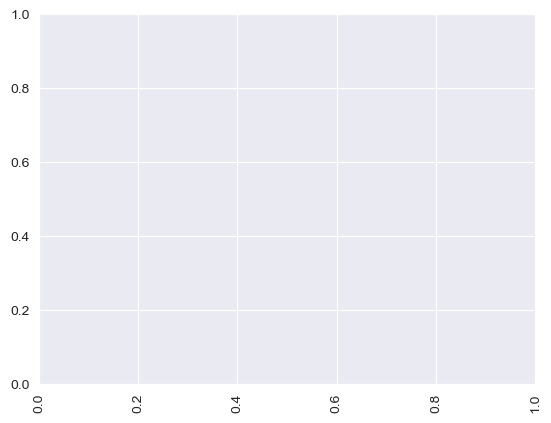

In [208]:
sns.barplot(data=percent_nan, x='pertcentage', y='percent_missing', color='blue')
plt.xticks(rotation=90)
plt.show()